In [193]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
import seaborn as sns

1. Load and Explore the Data:


In [194]:
df = pd.read_csv('Breast Cancer Diagnosis Dataset with Tumor Characteristics.csv')
print(df.head(10))

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   
5    843786         M        12.45         15.70           82.57      477.1   
6    844359         M        18.25         19.98          119.60     1040.0   
7  84458202         M        13.71         20.83           90.20      577.9   
8    844981         M        13.00         21.82           87.50      519.8   
9  84501001         M        12.46         24.04           83.97      475.9   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760         0.30010 

In [195]:
#Handle Missing Values
print(df.isnull().sum())

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

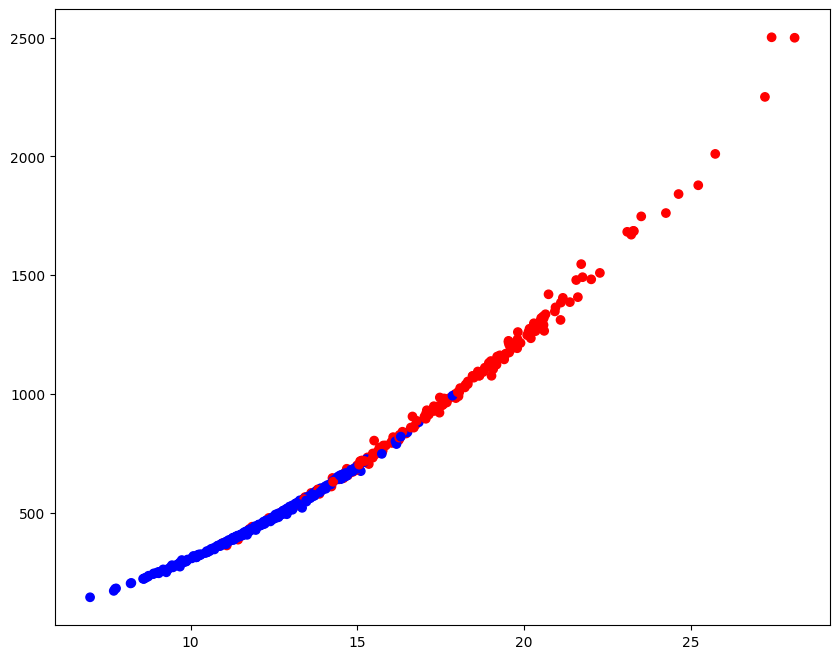

In [196]:
# EDA performance
print(df.describe())
plt.figure(figsize=(10,8))
plt.scatter(df['radius_mean'], df['area_mean'], c=df['diagnosis'].map({'M': 'red', 'B': 'blue'}))

In [197]:
#Drop Missing Values
df = df.drop(columns=['id', 'Unnamed: 32'], errors = 'ignore')

In [198]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [199]:
#Normalize or scale the data as required
scaler = StandardScaler()
features = df.drop(columns=['diagnosis'])
target = df['diagnosis']
scaled_features = scaler.fit_transform(features)


In [200]:

#Split the data into training (80%) and testing (20%) sets.
X_train, X_test, y_train, y_test = train_test_split(scaled_features, df['diagnosis'], test_size=0.2, random_state=42)


2. Model Development

In [201]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.9473684210526315


In [202]:
print(confusion_matrix(y_test, y_pred))


[[68  3]
 [ 3 40]]


In [203]:
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred_lr)}')
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Accuracy: 0.9736842105263158
[[70  1]
 [ 2 41]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



Train the KNN Model

In [204]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred_knn = knn.predict(X_test)

Train the Logistic Regression Model

In [205]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

# Make predictions on the test data
y_pred_logreg = logreg.predict(X_test)

Compare

In [206]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn * 100:.2f}%")
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))

# Evaluate Logistic Regression model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg * 100:.2f}%")
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_logreg))

KNN Accuracy: 94.74%
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Logistic Regression Accuracy: 97.37%
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



Model Evaluation:

In [207]:
print("KNN Evaluation:")
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy: {accuracy_knn * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

# Evaluate Logistic Regression model
print("Logistic Regression Evaluation:")
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Accuracy: {accuracy_logreg * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))

KNN Evaluation:
Accuracy: 94.74%
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Logistic Regression Evaluation:
Accuracy: 97.37%
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



KNN COnfusion matrix

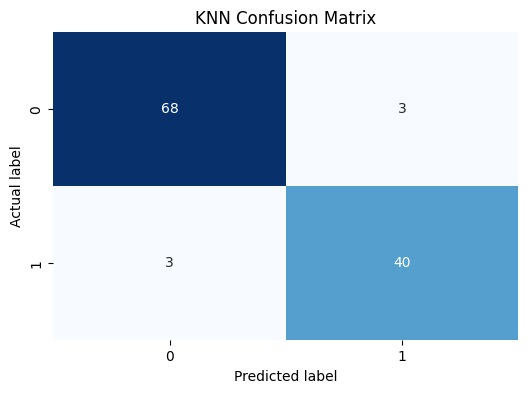

In [208]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6,4))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('KNN Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

Logistic Confusion Matrix

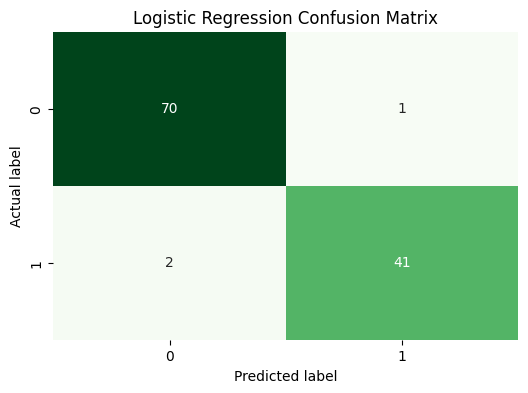

In [209]:
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(6,4))
sns.heatmap(cm_logreg, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.title('Logistic Regression Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


In this project, we started by preparing the data. We removed unneeded columns, split the data into 80% for training and 20% for testing, and scaled the features to make them ready for modeling. We built two models: K-Nearest Neighbors (KNN) and Logistic Regression. To check how well they worked, we used accuracy, precision, recall, F1-score, and confusion matrices. KNN performed well but was not as good as Logistic Regression at correctly identifying malignant tumors. Logistic Regression had better results, with higher accuracy and fewer mistakes. The confusion matrices showed that Logistic Regression made fewer errors, making it a better choice for this task.